# Machine Learning Final Project

## Leonardo Daou

## Manel R. Benabid

## Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import shutil
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
import math
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rs
from sklearn.metrics import multilabel_confusion_matrix as cm
from sklearn.metrics import confusion_matrix as cms
from sklearn.metrics import roc_auc_score as auc
from tensorflow.keras.losses import BinaryCrossentropy
# create a data generator
datagen = ImageDataGenerator() 

## Data Splitting

In [2]:
data = datagen.flow_from_directory('./Ultsrasound-Mice/',batch_size=11,shuffle=False,color_mode="rgb")

Found 341 images belonging to 3 classes.


Loading the data in order to split them by mouse and class

### NOTE: Only run to create new splits, no seeds added

In [467]:
os.makedirs("./SR_UM2")
for i in range(0,len(data)):
    print("I---------------",i)
    d=data[i]
    images=d[0]
    classes=d[1]
    for j in range(0,len(images)):
        print("J--------------",j)
        if j==0:
            os.makedirs('./SR_UM2/'+data.filenames[(11*i)+j].split('\\')[0]+'/'+data.filenames[(11*i)+j].split('\\')[1].split('_fr')[0])
            print("File created")
        img=images[j]
        c=classes[j]
        cv2.imwrite('./SR_UM2/'+data.filenames[(11*i)+j].split('\\')[0]+'/'+data.filenames[(11*i)+j].split('\\')[1].split('_fr')[0]+'/'+data.filenames[(11*i)+j].split('\\')[1],img)

I--------------- 0
J-------------- 0
File created
J-------------- 1
J-------------- 2
J-------------- 3
J-------------- 4
J-------------- 5
J-------------- 6
J-------------- 7
J-------------- 8
J-------------- 9
J-------------- 10
I--------------- 1
J-------------- 0
File created
J-------------- 1
J-------------- 2
J-------------- 3
J-------------- 4
J-------------- 5
J-------------- 6
J-------------- 7
J-------------- 8
J-------------- 9
J-------------- 10
I--------------- 2
J-------------- 0
File created
J-------------- 1
J-------------- 2
J-------------- 3
J-------------- 4
J-------------- 5
J-------------- 6
J-------------- 7
J-------------- 8
J-------------- 9
J-------------- 10
I--------------- 3
J-------------- 0
File created
J-------------- 1
J-------------- 2
J-------------- 3
J-------------- 4
J-------------- 5
J-------------- 6
J-------------- 7
J-------------- 8
J-------------- 9
J-------------- 10
I--------------- 4
J-------------- 0
File created
J-------------- 1
J-------

Loading the data again in order to split them into train and test

In [86]:
for z in range(0,10):
    for j in range(0,3):
        dirs=np.array(os.listdir("./SR_UM2/"+str(j)))
        classes=[j]*len(dirs)
        X_train, X_test, y_train, y_test = train_test_split(dirs, classes, test_size=0.30)
        print("Training Files--------------")
        for i in range(0,len(X_train)):
            print('./SR_UM2/',y_train[i],'/',X_train[i],sep="")
            shutil.copytree('./SR_UM2/'+str(y_train[i])+'/'+X_train[i], './splits/Ordered_data'+str(z)+'/train/'+str(j)+'/',dirs_exist_ok=True)
        print("Testing Files--------------")
        for i in range(0,len(X_test)):
            print('./SR_UM2/',y_test[i],'/',X_test[i],sep="")
            shutil.copytree('./SR_UM2/'+str(y_test[i])+'/'+X_test[i], './splits/Ordered_data'+str(z)+'/test/'+str(j)+'/',dirs_exist_ok=True)

Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/0/B145849_D7
C:/Users/Leo/Desktop/SR_UM2/0/B145848_D7
C:/Users/Leo/Desktop/SR_UM2/0/L145848_D7
C:/Users/Leo/Desktop/SR_UM2/0/R145849_D7
C:/Users/Leo/Desktop/SR_UM2/0/LL145848_D7
Testing Files--------------
C:/Users/Leo/Desktop/SR_UM/0/RR145848_D7
C:/Users/Leo/Desktop/SR_UM/0/L145849_D7
C:/Users/Leo/Desktop/SR_UM/0/R145848_D7
Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/1/R145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/LL145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/L145143_D7
C:/Users/Leo/Desktop/SR_UM2/1/RR145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/RR145143_D7
C:/Users/Leo/Desktop/SR_UM2/1/B145143_D7
Testing Files--------------
C:/Users/Leo/Desktop/SR_UM/1/LL145143_D7
C:/Users/Leo/Desktop/SR_UM/1/R145143_D7
C:/Users/Leo/Desktop/SR_UM/1/B145142_D7
Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/2/RR144081_D7
C:/Users/Leo/Desktop/SR_UM2/2/L144082_D7
C:/Users/Leo/Desktop/SR_UM2/2/B144082_D7
C:/Users/Leo/Desktop/SR_UM2/2/LL1440

C:/Users/Leo/Desktop/SR_UM/2/L145144_D7
C:/Users/Leo/Desktop/SR_UM/2/LL144081_D7
Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/0/L145848_D7
C:/Users/Leo/Desktop/SR_UM2/0/R145848_D7
C:/Users/Leo/Desktop/SR_UM2/0/LL145848_D7
C:/Users/Leo/Desktop/SR_UM2/0/B145849_D7
C:/Users/Leo/Desktop/SR_UM2/0/RR145848_D7
Testing Files--------------
C:/Users/Leo/Desktop/SR_UM/0/B145848_D7
C:/Users/Leo/Desktop/SR_UM/0/L145849_D7
C:/Users/Leo/Desktop/SR_UM/0/R145849_D7
Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/1/L145143_D7
C:/Users/Leo/Desktop/SR_UM2/1/RR145143_D7
C:/Users/Leo/Desktop/SR_UM2/1/R145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/RR145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/LL145142_D7
C:/Users/Leo/Desktop/SR_UM2/1/LL145143_D7
Testing Files--------------
C:/Users/Leo/Desktop/SR_UM/1/R145143_D7
C:/Users/Leo/Desktop/SR_UM/1/B145142_D7
C:/Users/Leo/Desktop/SR_UM/1/B145143_D7
Training Files--------------
C:/Users/Leo/Desktop/SR_UM2/2/LL144081_D7
C:/Users/Leo/Desktop/SR_UM2/2/B144081

## Data Exploration

Creating Heatmaps in order to understand the quality of the images and whether there are any interesting features that we can see.
We reduced the dimensions of the image in order to be able to clearly see the important parts and transformed it to grayscale in order to only have the intensity remaining.
The light spots indicate the real dark spots of the image and the dark spots indicate the real light spots of the image. This was done to be able to see the crucial regions of the images.

<AxesSubplot:title={'center':'Control Fibros Heat Map'}>

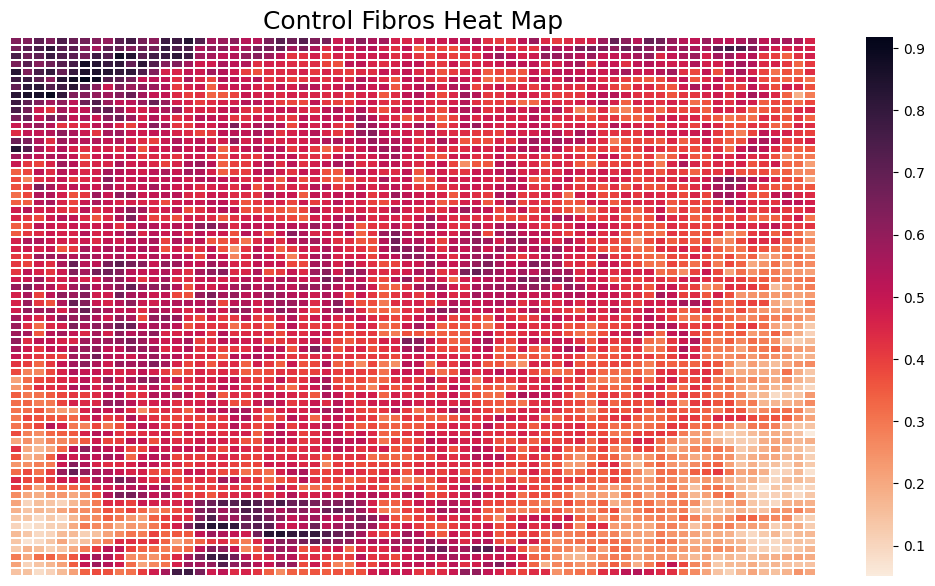

In [7]:
img = cv2.imread("./Ultsrasound-Mice/0/B145848_D7_fr_40.jpg")
dim = (70, 70)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)/255

fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Control Fibros Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')
seaborn.heatmap(gray,fmt="",cmap=seaborn.color_palette("rocket_r", as_cmap=True),linewidths=0.30,ax=ax)

<AxesSubplot:title={'center':'Mild Fibrosis Heat Map'}>

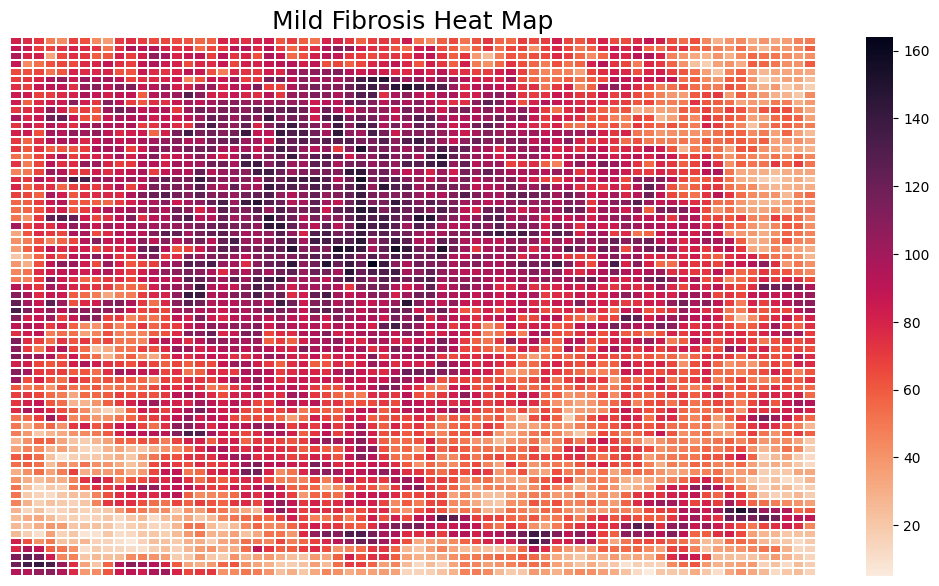

In [8]:
img = cv2.imread("./Ultsrasound-Mice/1/B145143_D7_fr_41.jpg")
dim = (70, 70)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Mild Fibrosis Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')
seaborn.heatmap(gray,fmt="",cmap=seaborn.color_palette("rocket_r", as_cmap=True),linewidths=0.30,ax=ax)

<AxesSubplot:title={'center':'Severe Fibrosis Heat Map'}>

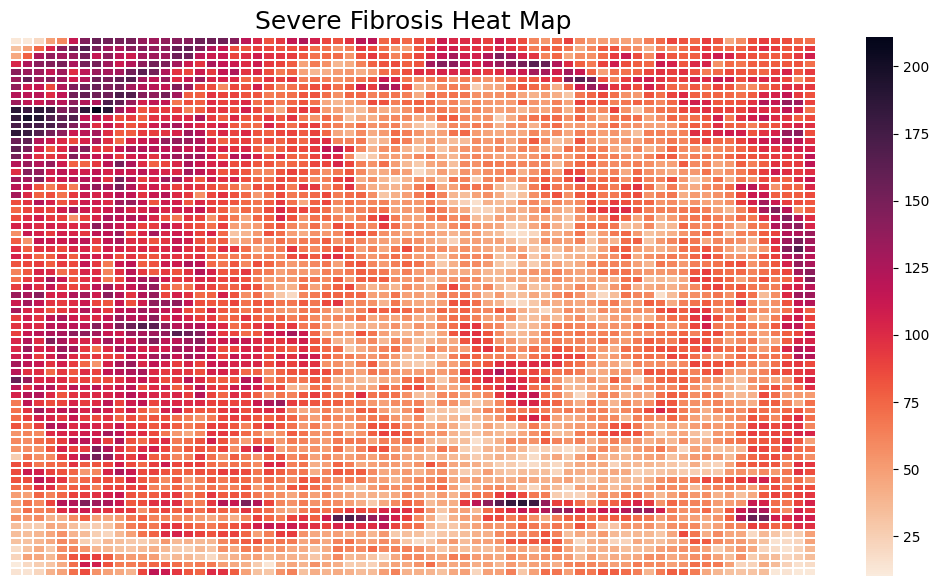

In [9]:
img = cv2.imread("./Ultsrasound-Mice/2/RR144081_D7_fr_90.jpg")
dim = (70, 70)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Severe Fibrosis Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')
seaborn.heatmap(gray,fmt="",cmap=seaborn.color_palette("rocket_r", as_cmap=True),linewidths=0.30,ax=ax)

## The Model

The final model we came up with which consistited of VGG11 which is transfered from pytorch to keras. We got the weights from pytorch and set them to out implementation of VGG11 since keras does not have it, it only has VGG16 an VGG19.

After setting the weights, the fully connected layers were dropped in order to add our own layers which were a dense layer of 500 neurons with sigmoid acitvation function and followed by a relu layer with a dropout of 0.6.  It was followed by another dense layer of 200 neurons wwith sigmoid activation function and a dropout of 0.6. The last output layer is formed of 3 neurons with softmax activation function.

Since we are using transfer learning, we need to fine-tune the convolution part of the network, which is why we used two learning rate, one which is 0.001 for the convolution layer, and it will decay until 0.0001. Then we have a learning rate of 0.01 for the fully connected layers. They both use SGD as optimizers and a momentum of 0.9.

It used a 100 epochs.
This was looped over 3 splits that are saved in folders.

In [15]:
models=[]
histories=[]
for l in range(7,10):
    train = datagen.flow_from_directory('splits/Ordered_data'+str(l)+'/train/', 
                                           target_size=(224, 224), 
                                           color_mode='rgb', 
                                           class_mode='categorical', 
                                           batch_size=8,shuffle=True)
    test = datagen.flow_from_directory('splits/Ordered_data'+str(l)+'/test/', 
                                          target_size=(224, 224), 
                                          color_mode='rgb', 
                                          class_mode='categorical', 
                                          batch_size=8,shuffle=True)

    vgg11=torchvision.models.vgg11(weights='DEFAULT').eval()
    model=Sequential()
    model.add(Conv2D(64,(3,3),input_shape=(224,224,3),padding="same",strides=(1,1),activation="relu"))
    model.add(MaxPooling2D((2,2),strides=2))
    model.add(Conv2D(128,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(MaxPooling2D((2,2),strides=2,padding="same"))
    model.add(Conv2D(256,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(Conv2D(256,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(MaxPooling2D((2,2),strides=2,padding="same"))
    model.add(Conv2D(512,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(Conv2D(512,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(MaxPooling2D((2,2),strides=2,padding="same"))
    model.add(Conv2D(512,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(Conv2D(512,(3,3),padding="same",strides=(1,1),activation="relu"))
    model.add(MaxPooling2D((2,2),strides=2,padding="same"))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    torch_weights = vgg11.state_dict()
    # Reshape weights for Keras model
    keras_weights = [w.numpy() for w in torch_weights.values()]
    for i in [0, 2, 4, 6, 8, 10, 12, 14]:
        # conv2d layer: Torch (out,in,h,w) Keras (h,w,in,out)
        keras_weights[i] = np.moveaxis(keras_weights[i], [0,1], [-1,-2])
    for i in [16, 18, 20]:
        # dense layer: transpose
        keras_weights[i] = keras_weights[i].T
    # Set to Keras model
    model.set_weights(keras_weights)

    base_model=model


    inputs = keras.Input(shape=(224, 224, 3))
    vgg11 = keras.models.Model(inputs=base_model.input, outputs=base_model.layers[-2].output)
    vgg11 = keras.models.Model(inputs=vgg11.input, outputs=vgg11.layers[-2].output)
    vgg11 = keras.models.Model(inputs=vgg11.input, outputs=vgg11.layers[-2].output)
    vgg11 = keras.models.Model(inputs=vgg11.input, outputs=vgg11.layers[-2].output)
    vgg11 = keras.models.Model(inputs=vgg11.input, outputs=vgg11.layers[-2].output)
    vgg11.trainable = True
    x = vgg11(inputs, training=True)

    new_model=(keras.layers.Dense(500,activation='sigmoid'))(x)
    new_model=(keras.layers.Activation(tf.keras.activations.relu))(new_model)
    new_model=(keras.layers.Dropout(0.6))(new_model)
    new_model=(keras.layers.Dense(200,activation='sigmoid'))(new_model)
    new_model=(keras.layers.Dropout(0.6))(new_model)
    new_model=(keras.layers.Dense(3,activation='softmax'))(new_model)
    new_model = keras.Model(inputs, new_model)

    model=new_model

    starter_learning_rate = 0.001
    end_learning_rate = 0.0001
    decay_steps = 270
    learning_rate_fn2 = tf.keras.optimizers.schedules.PolynomialDecay(
        starter_learning_rate,
        decay_steps,
        end_learning_rate,
        power=0.9)

    optimizers = [
        tf.keras.optimizers.SGD(learning_rate=learning_rate_fn2,momentum=0.9),
        tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
    ]
    es=keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.005, patience=50, mode="min")
    optimizers_and_layers = [(optimizers[0], model.layers[1]), (optimizers[1], model.layers[2:len(model.layers)])]
    optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
    model.compile(optimizer=optimizer,loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

    history=model.fit(train, validation_data=test, steps_per_epoch=train.samples/train.batch_size, epochs=100)
    histories.append(history)
    models.append(model)

Found 220 images belonging to 3 classes.
Found 121 images belonging to 3 classes.
Epoch 1/100
27/27 [==============================] - 45s 2s/step - loss: 0.7891 - accuracy: 0.3545 - val_loss: 0.6519 - val_accuracy: 0.2727
Epoch 2/100
27/27 [==============================] - 41s 2s/step - loss: 0.6943 - accuracy: 0.3727 - val_loss: 0.6229 - val_accuracy: 0.4545
Epoch 3/100
27/27 [==============================] - 43s 2s/step - loss: 0.6767 - accuracy: 0.3955 - val_loss: 0.6379 - val_accuracy: 0.4298
Epoch 4/100
27/27 [==============================] - 44s 2s/step - loss: 0.6589 - accuracy: 0.3955 - val_loss: 0.6231 - val_accuracy: 0.4545
Epoch 5/100
27/27 [==============================] - 41s 2s/step - loss: 0.6631 - accuracy: 0.3864 - val_loss: 0.6204 - val_accuracy: 0.4463
Epoch 6/100
27/27 [==============================] - 41s 1s/step - loss: 0.6317 - accuracy: 0.4455 - val_loss: 0.6319 - val_accuracy: 0.3058
Epoch 7/100
27/27 [==============================] - 54s 2s/step - loss:

27/27 [==============================] - 55s 2s/step - loss: 0.4486 - accuracy: 0.6818 - val_loss: 0.6306 - val_accuracy: 0.4215
Epoch 16/100
27/27 [==============================] - 56s 2s/step - loss: 0.4165 - accuracy: 0.7273 - val_loss: 0.6484 - val_accuracy: 0.4628
Epoch 17/100
27/27 [==============================] - 55s 2s/step - loss: 0.3954 - accuracy: 0.7591 - val_loss: 0.7280 - val_accuracy: 0.3884
Epoch 18/100
27/27 [==============================] - 55s 2s/step - loss: 0.3985 - accuracy: 0.7000 - val_loss: 0.6916 - val_accuracy: 0.4050
Epoch 19/100
27/27 [==============================] - 56s 2s/step - loss: 0.3456 - accuracy: 0.7727 - val_loss: 0.6636 - val_accuracy: 0.4215
Epoch 20/100
27/27 [==============================] - 55s 2s/step - loss: 0.3051 - accuracy: 0.8318 - val_loss: 0.6792 - val_accuracy: 0.4628
Epoch 21/100
27/27 [==============================] - 55s 2s/step - loss: 0.2702 - accuracy: 0.8636 - val_loss: 0.6122 - val_accuracy: 0.5455
Epoch 22/100
27/27 

Epoch 73/100
27/27 [==============================] - 31s 1s/step - loss: 0.0111 - accuracy: 0.9955 - val_loss: 1.0961 - val_accuracy: 0.5785
Epoch 74/100
27/27 [==============================] - 30s 1s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.9531 - val_accuracy: 0.6529
Epoch 75/100
27/27 [==============================] - 30s 1s/step - loss: 0.0125 - accuracy: 0.9909 - val_loss: 0.8849 - val_accuracy: 0.6694
Epoch 76/100
27/27 [==============================] - 31s 1s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.6446
Epoch 77/100
27/27 [==============================] - 31s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.0680 - val_accuracy: 0.6116
Epoch 78/100
27/27 [==============================] - 31s 1s/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 1.2773 - val_accuracy: 0.5950
Epoch 79/100
27/27 [==============================] - 30s 1s/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.1286 - val_accuracy: 0.5620
Epoch 

Epoch 88/100
27/27 [==============================] - 30s 1s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.8094 - val_accuracy: 0.6612
Epoch 89/100
27/27 [==============================] - 30s 1s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8108 - val_accuracy: 0.6612
Epoch 90/100
27/27 [==============================] - 30s 1s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.0072 - val_accuracy: 0.6116
Epoch 91/100
27/27 [==============================] - 30s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.7351 - val_accuracy: 0.6860
Epoch 92/100
27/27 [==============================] - 30s 1s/step - loss: 0.0113 - accuracy: 0.9955 - val_loss: 0.8567 - val_accuracy: 0.6364
Epoch 93/100
27/27 [==============================] - 30s 1s/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.8373 - val_accuracy: 0.6116
Epoch 94/100
27/27 [==============================] - 30s 1s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.8645 - val_accuracy: 0.5868
Epoch 

## Results

Some plots for one of the trial runs.
Validation is completely unseen data. We just added it to monitor the progression.

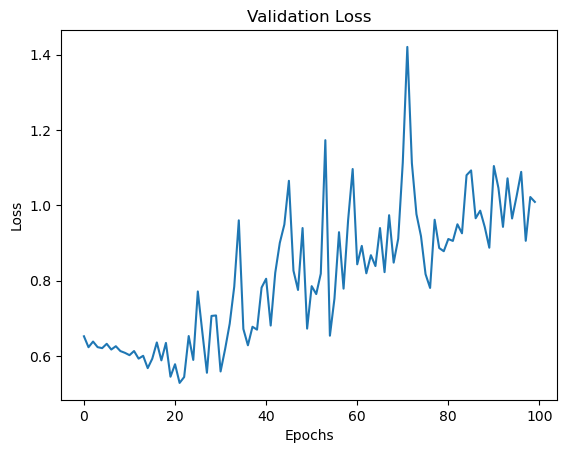

In [431]:
plt.plot(histories[0].history['val_loss'])
plt.title("Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

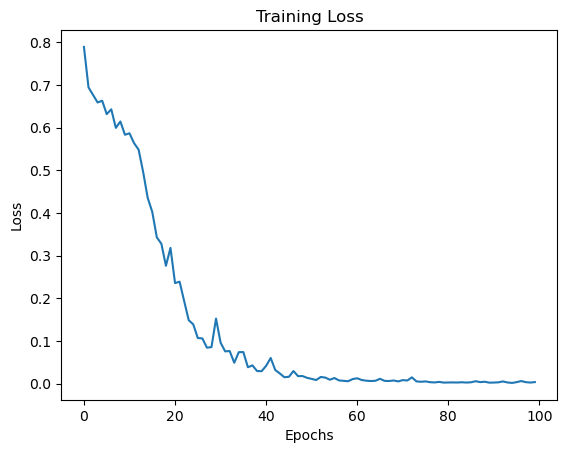

In [456]:
plt.plot(histories[0].history['loss'])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

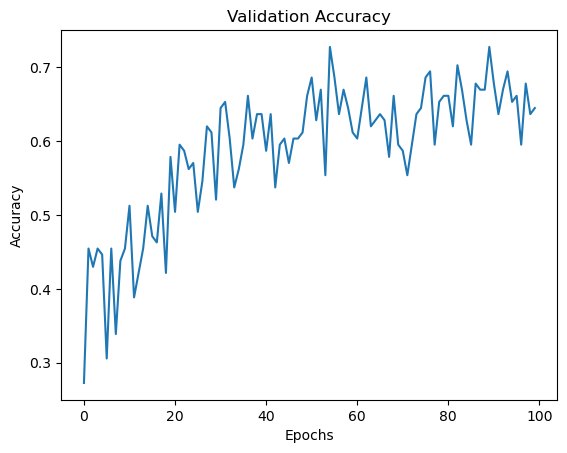

In [457]:
plt.plot(histories[0].history['val_accuracy'])
plt.title("Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

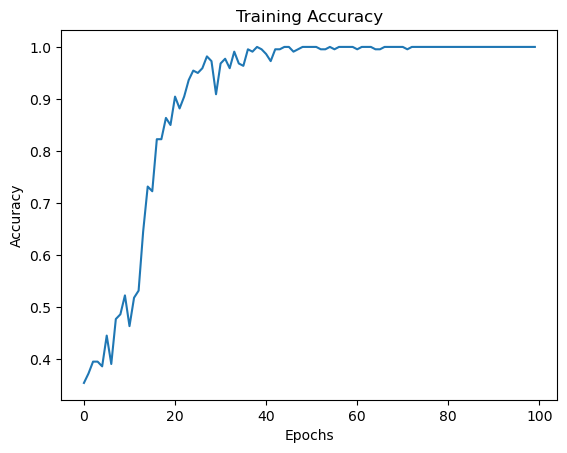

In [458]:
plt.plot(histories[0].history['accuracy'])
plt.title("Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

## Predicting the test set using the three models obtianed from the three trials

In [447]:
dgen_no_shuffle = datagen.flow_from_directory('splits/Ordered_data7/test/',target_size=(224,224),batch_size=8,interpolation="lanczos",shuffle=False)
 
dgen_no_shuffle.reset() #resets the generator to the first batch

Found 121 images belonging to 3 classes.


In [241]:
dgen_no_shuffle.reset() 
y=models[0].predict(dgen_no_shuffle,steps= math.ceil(dgen_no_shuffle.samples//dgen_no_shuffle.batch_size),workers=8)

15/15 [==============================] - 9s 556ms/step


In [385]:
dgen_no_shuffle.reset()
classes_test3=dgen_no_shuffle[0][1]
for i in range(1,len(dgen_no_shuffle)):
    classes_test3=np.concatenate([classes_test3,dgen_no_shuffle[i][1]])

In [243]:
preds30=np.zeros((121,3))
c=0
for i in y:
    a=np.where(i==np.max(i))
    preds30[c][a]=1.
    c=c+1

In [244]:
acc3=accuracy_score(classes_test3,preds30)
print(acc3)

0.7107438016528925


In [450]:
dgen_no_shuffle = datagen.flow_from_directory('splits/Ordered_data8/test/',target_size=(224,224),batch_size=8,interpolation="lanczos",shuffle=False)
dgen_no_shuffle.reset() #resets the generator to the first batch
y2=models[1].predict(dgen_no_shuffle,steps= math.ceil(dgen_no_shuffle.samples//dgen_no_shuffle.batch_size),workers=8)

Found 121 images belonging to 3 classes.


In [386]:
dgen_no_shuffle.reset()
classes_test2=dgen_no_shuffle[0][1]
for i in range(1,len(dgen_no_shuffle)):
    classes_test2=np.concatenate([classes_test2,dgen_no_shuffle[i][1]])

In [320]:
preds20=np.zeros((121,3))
c=0
for i in y2:
    a=np.where(i==np.max(i))
    preds20[c][a]=1.
    c=c+1

In [326]:
acc2=accuracy_score(classes_test2,preds20)
print(acc2)

0.6611570247933884


In [453]:
dgen_no_shuffle = datagen.flow_from_directory('splits/Ordered_data9/test/',target_size=(224,224),batch_size=8,interpolation="lanczos",shuffle=False)
dgen_no_shuffle.reset() #resets the generator to the first batch
y3=models[2].predict(dgen_no_shuffle,steps= math.ceil(dgen_no_shuffle.samples//dgen_no_shuffle.batch_size),workers=8)

Found 121 images belonging to 3 classes.


In [387]:
dgen_no_shuffle.reset()
classes_test1=dgen_no_shuffle[0][1]
for i in range(1,len(dgen_no_shuffle)):
    classes_test1=np.concatenate([classes_test1,dgen_no_shuffle[i][1]])

In [323]:
preds10=np.zeros((121,3))
c=0
for i in y3:
    a=np.where(i==np.max(i))
    preds10[c][a]=1.
    c=c+1

In [415]:
acc1=accuracy_score(classes_test1,preds10)
print(acc1)

0.6611570247933884


### Saving the results

In [442]:
ct3=pd.DataFrame(classes_test3)
pd30=pd.DataFrame(preds30)
ct2=pd.DataFrame(classes_test2)
pd20=pd.DataFrame(preds20)
ct1=pd.DataFrame(classes_test1)
pd10=pd.DataFrame(preds10)

In [443]:
ct3.to_csv('./resulting/ct1.csv')
pd30.to_csv('./resulting/preds10.csv')
ct2.to_csv('./resulting/ct2.csv')
pd20.to_csv('./resulting/preds20.csv')
ct1.to_csv('./resulting/ct3.csv')
pd10.to_csv('./resulting/preds30.csv')

### Re-reading the results

In [10]:
preds=[]
for i in range(1,4):
    preds.append(pd.read_csv('resulting/preds'+str(i*10)+'.csv'))

In [56]:
for i in range(0,3):
    preds[i]=preds[i].drop('Unnamed: 0',axis=1)

In [50]:
class_test=[]
for i in range(1,4):
    class_test.append(pd.read_csv('resulting/ct'+str(i)+'.csv'))

In [53]:
for i in range(0,3):
    class_test[i]=class_test[i].drop('Unnamed: 0',axis=1)

## For one mice per trial

In [72]:
bce=BinaryCrossentropy()

In [284]:
per_mices=[]
for j in range(0,3):
    per_mice=pd.DataFrame(np.zeros((13,32)))
    per_mice.columns=['Binary Crossentropy Loss','Precision','Recall','Accuracy','F-measure','Precision for control','Recall for control','Accuracy for control','Specificity for control','F-measure for control','TP for control','FP for control','TN for control','FN for control','Precision for mild','Recall for mild','Accuracy for mild','Specificity for mild','F-measure for mild','TP for mild','FP for mild','TN for mild','FN for mild','Precision for severe','Recall for severe','Accuracy for severe','Specificity for severe','F-measure for severe','TP for severe','FP for severe','TN for severe','FN for severe']
    z=list(range(1,12))
    per_mice.index=z+['Average','Stdev']
    cmc=0
    for counter in range(0,11):
        p=pr(class_test[j].iloc[cmc:cmc+11,:],preds[j].iloc[cmc:cmc+11,:],average="micro")
        r=rs(class_test[j].iloc[cmc:cmc+11,:],preds[j].iloc[cmc:cmc+11,:],average="micro")
        a=ac(class_test[j].iloc[cmc:cmc+11,:],preds[j].iloc[cmc:cmc+11,:])
        if p==0 and r==0:
            f=0
        else:
            f=2*((p*r)/(p+r))
        per_mice.at[counter+1,'F-measure']=f
        per_mice.at[counter+1,'Precision']=p
        per_mice.at[counter+1,'Accuracy']=a
        per_mice.at[counter+1,'Recall']=r

        matrix=cm(class_test[j].iloc[cmc:cmc+11,:],preds[j].iloc[cmc:cmc+11,:])

        b=bce(class_test[j].iloc[cmc:cmc+11,:],preds[j].iloc[cmc:cmc+11,:]).numpy()
        per_mice.at[counter+1,'Binary Crossentropy Loss']=b

        c0=matrix[0]
        c1=matrix[1]
        c2=matrix[2]

        tn0=c0[0,0]
        fp0=c0[0,1]
        fn0=c0[1,0]
        tp0=c0[1,1]
        per_mice.at[counter+1,'TP for control']=tp0
        per_mice.at[counter+1,'FP for control']=fp0
        per_mice.at[counter+1,'TN for control']=tn0
        per_mice.at[counter+1,'FN for control']=fn0
        tn1=c1[0,0]
        fp1=c1[0,1]
        fn1=c1[1,0]
        tp1=c1[1,1]
        per_mice.at[counter+1,'TP for mild']=tp1
        per_mice.at[counter+1,'FP for mild']=fp1
        per_mice.at[counter+1,'TN for mild']=tn1
        per_mice.at[counter+1,'FN for mild']=fn1
        tn2=c2[0,0]
        fp2=c2[0,1]
        fn2=c2[1,0]
        tp2=c2[1,1]
        per_mice.at[counter+1,'TP for severe']=tp2
        per_mice.at[counter+1,'FP for severe']=fp2
        per_mice.at[counter+1,'TN for severe']=tn2
        per_mice.at[counter+1,'FN for severe']=fn2

        if tp0==0 and fp0==0:
            p0=0
        else:
            p0=tp0/(tp0+fp0)
        a0=(tp0+tn0)/(tp0+fn0+fp0+tn0)
        if tp0==0 and fn0==0:
            r0=0
        else:
            r0=tp0/(tp0+fn0)
        if tn0==0 and fp0==0:
            s0=0
        else:
            s0=tn0/(tn0+fp0)
        if p0==0 and r0==0:
            f0=0
        else:
            f0=2*((p0*r0)/(p0+r0))
        per_mice.at[counter+1,'F-measure for control']=f0
        per_mice.at[counter+1,'Precision for control']=p0
        per_mice.at[counter+1,'Accuracy for control']=a0
        per_mice.at[counter+1,'Recall for control']=r0
        per_mice.at[counter+1,'Specificity for control']=s0

        if tp1==0 and fp1==0:
            p1=0
        else:
            p1=tp1/(tp1+fp1)
        a1=(tp1+tn1)/(tp1+fn1+fp1+tn1)
        if tp1==0 and fn1==0:
            r1=0
        else:
            r1=tp1/(tp1+fn1)
        if tn1==0 and fp1==0:
            s1=0
        else:
            s1=tn1/(tn1+fp1)
        if p1==0 and r1==0:
            f1=0
        else:
            f1=2*((p1*r1)/(p1+r1))
        per_mice.at[counter+1,'F-measure for mild']=f1
        per_mice.at[counter+1,'Precision for mild']=p1
        per_mice.at[counter+1,'Accuracy for mild']=a1
        per_mice.at[counter+1,'Recall for mild']=r1
        per_mice.at[counter+1,'Specificity for mild']=s1
        if tp2==0 and fp2==0:
            p2=0
        else:
            p2=tp2/(tp2+fp2)
        a2=(tp2+tn2)/(tp2+fn2+fp2+tn2)
        if tp2==0 and fn2==0:
            r2=0
        else:
            r2=tp2/(tp2+fn2)
        if tn2==0 and fp2==0:
            s2=0
        else:
            s2=tn2/(tn2+fp2)
        if p2==0 and r2==0:
            f2=0
        else:
            f2=2*((p2*r2)/(p2+r2))
        per_mice.at[counter+1,'F-measure for severe']=f2
        per_mice.at[counter+1,'Precision for severe']=p2
        per_mice.at[counter+1,'Accuracy for severe']=a2
        per_mice.at[counter+1,'Recall for severe']=r2
        per_mice.at[counter+1,'Specificity for severe']=s2
        cmc=cmc+11
    mice=['mice_'+str(word) for word in z]
    per_mice.index=mice+['Average','Stdev']
    for i in range(0,len(per_mice.columns)):
        per_mice.iloc[11,i]=statistics.mean(per_mice.iloc[0:11,i])
        per_mice.iloc[12,i]=statistics.stdev(per_mice.iloc[0:11,i])
    per_mices.append(per_mice)

In [28]:
per_mices=[]
for j in range(1,4):
    a=pd.read_csv('Results/Mices_trial_'+str(j)+'.csv')
    a.index=list(a.iloc[:,0])
    a=a.drop('Unnamed: 0',axis=1)
    per_mices.append(a)

### Tables of results per mice per trial

In [29]:
per_mices[0]

,Binary Crossentropy Loss,Precision,Recall,Accuracy,F-measure,Precision for control,Recall for control,Accuracy for control,Specificity for control,F-measure for control,...,FN for mild,Precision for severe,Recall for severe,Accuracy for severe,Specificity for severe,F-measure for severe,TP for severe,FP for severe,TN for severe,FN for severe
mice_1,0.934845,0.909091,0.909091,0.909091,0.909091,1.000000,0.909091,0.909091,0.000000,0.952381,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
mice_2,2.804536,0.727273,0.727273,0.727273,0.727273,1.000000,0.727273,0.727273,0.000000,0.842105,...,0.000000,0.000000,0.000000,0.818182,0.818182,0.000000,0.000000,2.000000,9.000000,0.000000
mice_3,10.283299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
mice_4,8.413608,0.181818,0.181818,0.181818,0.181818,0.000000,0.000000,0.727273,0.727273,0.000000,...,9.000000,0.000000,0.000000,0.454545,0.454545,0.000000,0.000000,6.000000,5.000000,0.000000
mice_5,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
mice_6,2.804536,0.727273,0.727273,0.727273,0.727273,0.000000,0.000000,0.818182,0.818182,0.000000,...,3.000000,0.000000,0.000000,0.909091,0.909091,0.000000,0.000000,1.000000,10.000000,0.000000
mice_7,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
mice_8,2.804536,0.727273,0.727273,0.727273,0.727273,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.727273,0.727273,0.000000,0.842105,8.000000,0.000000,0.000000,3.000000
mice_9,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
mice_10,3.739381,0.636364,0.636364,0.636364,0.636364,0.000000,0.000000,0.909091,0.909091,0.000000,...,0.000000,1.000000,0.636364,0.636364,0.000000,0.777778,7.000000,0.000000,0.000000,4.000000


In [30]:
per_mices[1]

,Binary Crossentropy Loss,Precision,Recall,Accuracy,F-measure,Precision for control,Recall for control,Accuracy for control,Specificity for control,F-measure for control,...,FN for mild,Precision for severe,Recall for severe,Accuracy for severe,Specificity for severe,F-measure for severe,TP for severe,FP for severe,TN for severe,FN for severe
mice_1,4.674227,0.545455,0.545455,0.545455,0.545455,1.000000,0.545455,0.545455,0.000000,0.705882,...,0.000000,0.000000,0.000000,0.545455,0.545455,0.000000,0.000000,5.000000,6.000000,0.000000
mice_2,5.609072,0.454545,0.454545,0.454545,0.454545,1.000000,0.454545,0.454545,0.000000,0.625000,...,0.000000,0.000000,0.000000,0.818182,0.818182,0.000000,0.000000,2.000000,9.000000,0.000000
mice_3,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
mice_4,2.804536,0.727273,0.727273,0.727273,0.727273,0.000000,0.000000,1.000000,1.000000,0.000000,...,3.000000,0.000000,0.000000,0.727273,0.727273,0.000000,0.000000,3.000000,8.000000,0.000000
mice_5,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
mice_6,5.609072,0.454545,0.454545,0.454545,0.454545,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,0.000000,0.000000,0.454545,0.454545,0.000000,0.000000,6.000000,5.000000,0.000000
mice_7,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
mice_8,10.283299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.727273,0.727273,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
mice_9,1.869691,0.818182,0.818182,0.818182,0.818182,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.818182,0.818182,0.000000,0.900000,9.000000,0.000000,0.000000,2.000000
mice_10,1.869691,0.818182,0.818182,0.818182,0.818182,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.818182,0.818182,0.000000,0.900000,9.000000,0.000000,0.000000,2.000000


In [31]:
per_mices[2]

,Binary Crossentropy Loss,Precision,Recall,Accuracy,F-measure,Precision for control,Recall for control,Accuracy for control,Specificity for control,F-measure for control,...,FN for mild,Precision for severe,Recall for severe,Accuracy for severe,Specificity for severe,F-measure for severe,TP for severe,FP for severe,TN for severe,FN for severe
mice_1,1.869691,0.818182,0.818182,0.818182,0.818182,1.000000,0.818182,0.818182,0.000000,0.900000,...,0.000000,0.000000,0.000000,0.818182,0.818182,0.000000,0.000000,2.000000,9.000000,0.000000
mice_2,4.674227,0.545455,0.545455,0.545455,0.545455,1.000000,0.545455,0.545455,0.000000,0.705882,...,0.000000,0.000000,0.000000,0.636364,0.636364,0.000000,0.000000,4.000000,7.000000,0.000000
mice_3,10.283299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
mice_4,1.869691,0.818182,0.818182,0.818182,0.818182,0.000000,0.000000,1.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.818182,0.818182,0.000000,0.000000,2.000000,9.000000,0.000000
mice_5,0.934845,0.909091,0.909091,0.909091,0.909091,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.909091,0.909091,0.000000,0.000000,1.000000,10.000000,0.000000
mice_6,0.934845,0.909091,0.909091,0.909091,0.909091,0.000000,0.000000,0.909091,0.909091,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
mice_7,1.869691,0.818182,0.818182,0.818182,0.818182,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.818182,0.818182,0.000000,0.900000,9.000000,0.000000,0.000000,2.000000
mice_8,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
mice_9,5.609072,0.454545,0.454545,0.454545,0.454545,0.000000,0.000000,0.636364,0.636364,0.000000,...,0.000000,1.000000,0.454545,0.454545,0.000000,0.625000,5.000000,0.000000,0.000000,6.000000
mice_10,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000


## For each trial

In [302]:
per_trial=pd.DataFrame(np.zeros((5,33)))
per_trial.columns=['Binary Crossentropy Loss','AUC','Precision','Recall','Accuracy','F-measure','Precision for control','Recall for control','Accuracy for control','Specificity for control','F-measure for control','TP for control','FP for control','TN for control','FN for control','Precision for mild','Recall for mild','Accuracy for mild','Specificity for mild','F-measure for mild','TP for mild','FP for mild','TN for mild','FN for mild','Precision for severe','Recall for severe','Accuracy for severe','Specificity for severe','F-measure for severe','TP for severe','FP for severe','TN for severe','FN for severe']
z=list(range(1,4))
per_trial.index=z+['Average','Stdev']
for j in range(0,3):
    p=pr(class_test[j],preds[j],average="micro")
    r=rs(class_test[j],preds[j],average="micro")
    a=ac(class_test[j],preds[j])
    if p==0 and r==0:
        f=0
    else:
        f=2*((p*r)/(p+r))
    rac=auc(class_test[j],preds[j],multi_class='ovr')
    per_trial.at[j+1,'F-measure']=f
    per_trial.at[j+1,'Precision']=p
    per_trial.at[j+1,'Accuracy']=a
    per_trial.at[j+1,'Recall']=r
    per_trial.at[j+1, 'AUC']=rac
    matrix=cm(class_test[j],preds[j])

    b=bce(class_test[j],preds[j]).numpy()
    per_trial.at[j+1,'Binary Crossentropy Loss']=b

    c0=matrix[0]
    c1=matrix[1]
    c2=matrix[2]

    tn0=c0[0,0]
    fp0=c0[0,1]
    fn0=c0[1,0]
    tp0=c0[1,1]
    per_trial.at[j+1,'TP for control']=tp0
    per_trial.at[j+1,'FP for control']=fp0
    per_trial.at[j+1,'TN for control']=tn0
    per_trial.at[j+1,'FN for control']=fn0
    tn1=c1[0,0]
    fp1=c1[0,1]
    fn1=c1[1,0]
    tp1=c1[1,1]
    per_trial.at[j+1,'TP for mild']=tp1
    per_trial.at[j+1,'FP for mild']=fp1
    per_trial.at[j+1,'TN for mild']=tn1
    per_trial.at[j+1,'FN for mild']=fn1
    tn2=c2[0,0]
    fp2=c2[0,1]
    fn2=c2[1,0]
    tp2=c2[1,1]
    per_trial.at[j+1,'TP for severe']=tp2
    per_trial.at[j+1,'FP for severe']=fp2
    per_trial.at[j+1,'TN for severe']=tn2
    per_trial.at[j+1,'FN for severe']=fn2

    if tp0==0 and fp0==0:
        p0=0
    else:
        p0=tp0/(tp0+fp0)
    a0=(tp0+tn0)/(tp0+fn0+fp0+tn0)
    if tp0==0 and fn0==0:
        r0=0
    else:
        r0=tp0/(tp0+fn0)
    if tn0==0 and fp0==0:
        s0=0
    else:
        s0=tn0/(tn0+fp0)
    if p0==0 and r0==0:
        f0=0
    else:
        f0=2*((p0*r0)/(p0+r0))
    per_trial.at[j+1,'F-measure for control']=f0
    per_trial.at[j+1,'Precision for control']=p0
    per_trial.at[j+1,'Accuracy for control']=a0
    per_trial.at[j+1,'Recall for control']=r0
    per_trial.at[j+1,'Specificity for control']=s0

    if tp1==0 and fp1==0:
        p1=0
    else:
        p1=tp1/(tp1+fp1)
    a1=(tp1+tn1)/(tp1+fn1+fp1+tn1)
    if tp1==0 and fn1==0:
        r1=0
    else:
        r1=tp1/(tp1+fn1)
    if tn1==0 and fp1==0:
        s1=0
    else:
        s1=tn1/(tn1+fp1)
    if p1==0 and r1==0:
        f1=0
    else:
        f1=2*((p1*r1)/(p1+r1))
    per_trial.at[j+1,'F-measure for mild']=f1
    per_trial.at[j+1,'Precision for mild']=p1
    per_trial.at[j+1,'Accuracy for mild']=a1
    per_trial.at[j+1,'Recall for mild']=r1
    per_trial.at[j+1,'Specificity for mild']=s1
    if tp2==0 and fp2==0:
        p2=0
    else:
        p2=tp2/(tp2+fp2)
    a2=(tp2+tn2)/(tp2+fn2+fp2+tn2)
    if tp2==0 and fn2==0:
        r2=0
    else:
        r2=tp2/(tp2+fn2)
    if tn2==0 and fp2==0:
        s2=0
    else:
        s2=tn2/(tn2+fp2)
    if p2==0 and r2==0:
        f2=0
    else:
        f2=2*((p2*r2)/(p2+r2))
    per_trial.at[j+1,'F-measure for severe']=f2
    per_trial.at[j+1,'Precision for severe']=p2
    per_trial.at[j+1,'Accuracy for severe']=a2
    per_trial.at[j+1,'Recall for severe']=r2
    per_trial.at[j+1,'Specificity for severe']=s2
trial=['trial_'+str(word) for word in z]
per_trial.index=trial+['Average','Stdev']
for i in range(0,len(per_trial.columns)):
    per_trial.iloc[3,i]=statistics.mean(per_trial.iloc[0:3,i])
    per_trial.iloc[4,i]=statistics.stdev(per_trial.iloc[0:3,i])

In [22]:
per_trial=pd.read_csv('Results/Trials.csv')
per_trial.index=list(per_trial.iloc[:,0])
per_trial=per_trial.drop('Unnamed: 0',axis=1)

### Tables of results per trial

In [23]:
per_trial

,Binary Crossentropy Loss,AUC,Precision,Recall,Accuracy,F-measure,Precision for control,Recall for control,Accuracy for control,Specificity for control,...,FN for mild,Precision for severe,Recall for severe,Accuracy for severe,Specificity for severe,F-measure for severe,TP for severe,FP for severe,TN for severe,FN for severe
trial_1,3.441931,0.732828,0.666667,0.661157,0.661157,0.663900,0.750000,0.545455,0.826446,0.931818,...,12.000000,0.672131,0.745455,0.719008,0.696970,0.706897,41.000000,20.000000,46.000000,14.000000
trial_2,3.441931,0.749495,0.666667,0.661157,0.661157,0.663900,0.785714,0.666667,0.859504,0.931818,...,9.000000,0.680000,0.618182,0.694215,0.757576,0.647619,34.000000,16.000000,50.000000,21.000000
trial_3,2.932015,0.772475,0.716667,0.710744,0.710744,0.713693,0.681818,0.454545,0.793388,0.920455,...,4.000000,0.677419,0.763636,0.727273,0.696970,0.717949,42.000000,20.000000,46.000000,13.000000
Average,3.271959,0.751599,0.683333,0.677686,0.677686,0.680498,0.739177,0.555556,0.826446,0.928030,...,8.333333,0.676517,0.709091,0.713499,0.717172,0.690821,39.000000,18.666667,47.333333,16.000000
Stdev,0.294400,0.019907,0.028868,0.028629,0.028629,0.028748,0.052787,0.106421,0.033058,0.006561,...,4.041452,0.004011,0.079253,0.017204,0.034991,0.037820,4.358899,2.309401,2.309401,4.358899
